In [1]:
cd ../src

/Users/dani/Google Drive/Uni/Master/P4 2021/DD2424 - Deep Learning for Data Science/Project/ScarceClassifier/src


In [2]:
from d07_visualization.viz_training import plot_acc, plot_training_loss, plot_losses
from d04_mixmatch.wideresnet import WideResNet
from d02_data.load_data import get_dataloaders_ssl
from d07_visualization.visualize_cifar10 import show_img
from d02_data.load_data_idxs import get_dataloaders_with_index
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [3]:
train_loader, unlbl_loader, val_loader, test_loader, _, _, _ = get_dataloaders_ssl(path='../data', batch_size=64, num_labeled=45000, which_dataset='cifar10')

Files already downloaded and verified
Files already downloaded and verified


In [104]:
#file_name = 'adam_4k/adam_4k_pseudo_0.95/pseudo_matrix_0.95_50000.pt'
file_name = 'adam_4k/adam_4k_pseudo_balanced/pseudo_matrix_balanced_50000.pt'
#file_name = 'pseudo_matrix_90000.pt'
matrix_original = torch.load(f'../models/{file_name}', map_location=torch.device('cpu')) 

In [105]:
matrix_original.shape

torch.Size([4603, 5])

In [106]:
# matrix columns: [index, confidence, pseudo_label, true_label, is_ground_truth]
matrix_original[0,:]


tensor([2.7180e+03, 9.8313e-01, 0.0000e+00, 0.0000e+00, 1.0000e+00])

In [107]:
# Select a threshold
tau = 0
matrix = matrix_original[matrix_original[:,1] >= tau, :]
minimum_confidence = torch.min(matrix[:,1]).item()

pseudo_labels = matrix[:,2].numpy()
correct_labels = matrix[matrix[:,4] == 1, 2].numpy()
incorrect_labels = matrix[matrix[:,4] == 0, 2].numpy()
distr_labels = []
distr_correct_labels = []
distr_incorrect_labels = []
for i in range(10):
    distr_labels.append(np.sum(pseudo_labels == i))
    distr_correct_labels.append(np.sum(correct_labels == i))
    distr_incorrect_labels.append(np.sum(incorrect_labels == i))

correct = np.sum(distr_correct_labels)
incorrect = np.sum(distr_incorrect_labels)
accuracy = correct / (incorrect + correct)*100
print('Minimum confidence: %.2f' % (minimum_confidence))
print('Correct: %.2f' % (correct))
print('Incorrect: %.2f' % (incorrect))
print('Pseudo-label accuracy: %.2f' % (accuracy))


Minimum confidence: 0.88
Correct: 4408.00
Incorrect: 195.00
Pseudo-label accuracy: 95.76


In [108]:
torch.quantile(matrix_original[:,1], 0)

tensor(0.8780)

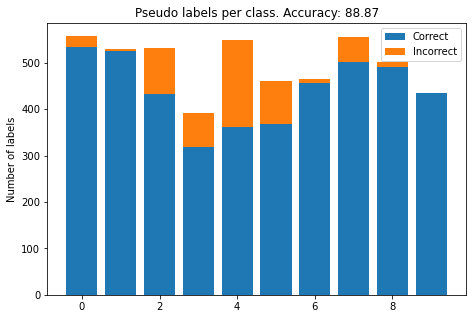

In [102]:
fig, ax = plt.subplots()

ax.bar(range(10), distr_correct_labels, label='Correct')
ax.bar(range(10), distr_incorrect_labels, bottom=distr_correct_labels, label='Incorrect')

ax.set_ylabel('Number of labels')
ax.set_title('Pseudo labels per class. Accuracy: %.2f' % (accuracy))
ax.legend()

fig = plt.gcf()
fig.set_size_inches(7.5, 5)
plt.savefig('../results/figs/fig.pdf')
plt.show()


In [43]:
print(matrix[matrix[:,2] == 3, 0])
print(matrix[matrix[:,2] == 3, 3])

tensor([10454., 10814., 15444.])
tensor([3., 3., 3.])


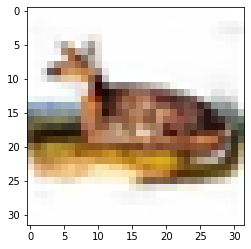

In [39]:
plt.imshow(train_loader.dataset.data[18011])

In [24]:
tau = 0
matrix = matrix_original[matrix_original[:,1] >= tau, :]
minimum_confidence = torch.min(matrix[:,1]).item()

matrix = matrix.numpy()
pseudo_labels = matrix[:,2]
correct_matrix = matrix[matrix[:,4] == 1, :]
incorrect_matrix = matrix[matrix[:,4] == 0, :]

print('Minimum confidence: %.2f' % (minimum_confidence))

Minimum confidence: 0.20


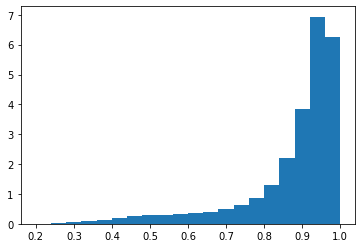

In [25]:
plt.hist(matrix[:,1], bins=20, density=True);

Confidence on the guessed label does have a correlation with correctness. But not too strong to be used for pseudo labelling

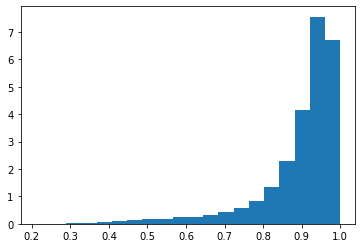

In [26]:
plt.hist(correct_matrix[:,1], bins=20, density=True);

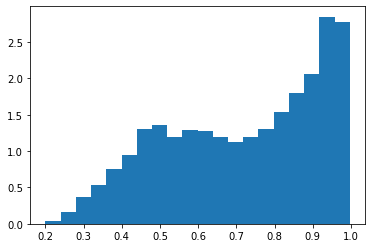

In [27]:
plt.hist(incorrect_matrix[:,1], bins=20, density=True);

In [38]:
tau = 0
matrix = matrix_original[matrix_original[:,1] >= tau, :]
minimum_confidence = torch.min(matrix[:,1]).item()

pseudo_confidence = matrix[:,1].numpy()
correct_confidence = matrix[matrix[:,4] == 1, 1].numpy()
incorrect_confidence = matrix[matrix[:,4] == 0, 1].numpy()
distr_confidence = []
distr_correct_confidence = []
distr_incorrect_confidence = []

n = 20
for i in range(n):
    distr_confidence.append(np.sum((pseudo_confidence >= i*1/n) & (pseudo_confidence < (i+1)*1/n)))
    distr_correct_confidence.append(np.sum((correct_confidence >= i*1/n) & (correct_confidence < (i+1)*1/n)))
    distr_incorrect_confidence.append(np.sum((incorrect_confidence >= i*1/n) & (incorrect_confidence < (i+1)*1/n)))

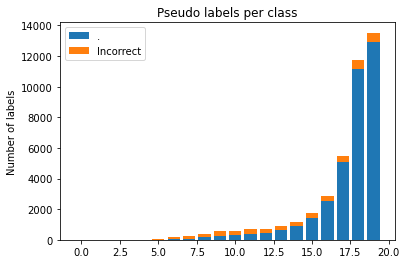

In [41]:
fig, ax = plt.subplots()

ax.bar(range(n), distr_correct_confidence, label='.')
ax.bar(range(n), distr_incorrect_confidence, bottom=distr_correct_confidence, label='Incorrect')

ax.set_ylabel('Number of labels')
ax.set_title('Pseudo labels per class')
ax.legend()

plt.show()